<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_2E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path2)

In [5]:

from sklearn.model_selection import train_test_split

In [6]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [7]:
df.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"
...,...,...,...,...,...,...,...,...,...
7338263,11658311,file,WARNING,Insecure functions found,"public native void call(final Pointer p0, @Cas...",CWE-676,Use of Potentially Dangerous Function,1,"public native void call(final Pointer p0, @Cas..."
7338264,11658313,file,WARNING,Insecure functions found,public native void call(freenect.freenect_cont...,CWE-676,Use of Potentially Dangerous Function,1,public native void call(freenect.freenect_cont...
7338265,11658315,file,WARNING,Insecure functions found,public native long call(final AVFormatContext ...,CWE-676,Use of Potentially Dangerous Function,1,public native long call(final AVFormatContext ...
7338266,11658317,file,WARNING,Insecure functions found,public native int call(avcodec.AVCodecContext ...,CWE-676,Use of Potentially Dangerous Function,1,public native int call(avcodec.AVCodecContext ...


In [8]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [9]:
df.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
7338300,11658361,NaN,NaN,NaN,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,0,pointerId2 = motionEvent.getPointerId(n10);
7338301,11658362,NaN,NaN,NaN,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,0,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;
7338302,11658363,NaN,NaN,NaN,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,0,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;
7338303,11658364,NaN,NaN,NaN,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,0,pressure3 = motionEvent.getPressure(n10);
7338304,11658366,NaN,NaN,NaN,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,0,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ..."


In [10]:
df.shape

(7338305, 9)

In [11]:
df.describe()

,index,Vulnerability_status
count,7.338305e+06,7.338305e+06
mean,5.193015e+06,7.490149e-03
std,3.454966e+06,8.622093e-02
min,0.000000e+00,0.000000e+00
25%,2.121401e+06,0.000000e+00
50%,4.857588e+06,0.000000e+00
75%,8.139075e+06,0.000000e+00
max,1.165837e+07,1.000000e+00


In [12]:
df.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [13]:
df.nunique()

,0
index,7338305
category,5
Severity,3
Description,29
Code,7294307
CWE_ID,14
CWE_Desc,14
Vulnerability_status,2
processed_code,7290454


In [14]:
df['Vulnerability_status'].unique()

array([0, 1])

In [15]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    7283340
1      54965
Name: count, dtype: int64


In [16]:
df_safe = df[df['Vulnerability_status']==0]

In [17]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [18]:
df_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [19]:
df_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
7338300,11658361,NaN,NaN,NaN,pointerId2 = motionEvent.getPointerId(n10);,NaN,NaN,0,pointerId2 = motionEvent.getPointerId(n10);
7338301,11658362,NaN,NaN,NaN,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;,NaN,NaN,0,n8 = motionEvent.getX(n10) / SDLSurface.mWidth;
7338302,11658363,NaN,NaN,NaN,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;,NaN,NaN,0,n9 = motionEvent.getY(n10) / SDLSurface.mHeight;
7338303,11658364,NaN,NaN,NaN,pressure3 = motionEvent.getPressure(n10);,NaN,NaN,0,pressure3 = motionEvent.getPressure(n10);
7338304,11658366,NaN,NaN,NaN,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ...",NaN,NaN,0,"SDLActivity.onNativeTouch(deviceId, n, 1, n6, ..."


In [20]:
df_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"


In [21]:
df_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
7338263,11658311,file,WARNING,Insecure functions found,"public native void call(final Pointer p0, @Cas...",CWE-676,Use of Potentially Dangerous Function,1,"public native void call(final Pointer p0, @Cas..."
7338264,11658313,file,WARNING,Insecure functions found,public native void call(freenect.freenect_cont...,CWE-676,Use of Potentially Dangerous Function,1,public native void call(freenect.freenect_cont...
7338265,11658315,file,WARNING,Insecure functions found,public native long call(final AVFormatContext ...,CWE-676,Use of Potentially Dangerous Function,1,public native long call(final AVFormatContext ...
7338266,11658317,file,WARNING,Insecure functions found,public native int call(avcodec.AVCodecContext ...,CWE-676,Use of Potentially Dangerous Function,1,public native int call(avcodec.AVCodecContext ...
7338268,11658319,file,WARNING,Insecure functions found,public native int call(@Const final Pointer p0);,CWE-676,Use of Potentially Dangerous Function,1,public native int call(@Const final Pointer p0);


In [22]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [23]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [24]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [25]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [26]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    54965
1    54965
Name: count, dtype: int64


In [27]:
print(df_balanced.value_counts())

index     category  Severity  Description               Code                                                                                                                                             CWE_ID   CWE_Desc                                          Vulnerability_status  processed_code                                                                    
11658319  file      WARNING   Insecure functions found  public native int call(@Const final Pointer p0);                                                                                                 CWE-676  Use of Potentially Dangerous Function             1                     public native int call(@Const final Pointer p0);                                      1
90        file      WARNING   Logging found             Log.w("ListPreference", "Setting a summary with a String formatting marker is no longer supported. You should use a SummaryProvider instead.");  CWE-532  Insertion of Sensitive Information into Log File  1    

<Axes: >

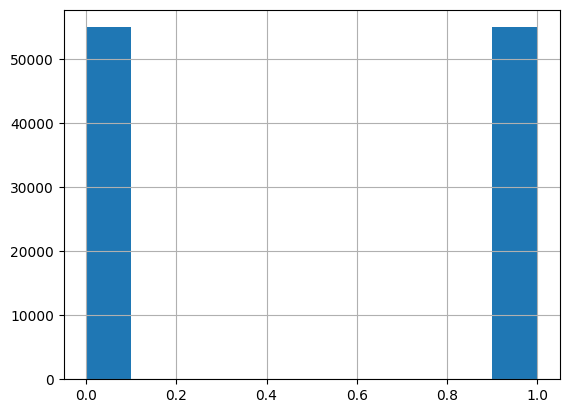

In [28]:
df_balanced['Vulnerability_status'].hist()

In [29]:
df_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,730537,NaN,NaN,NaN,"intent.putExtra(""ABOUT_LIBRARIES_TITLE"", this....",NaN,NaN,0,"intent.putExtra(""user_str"", this.activityTitle);"
1,1460241,file,WARNING,Logging found,"Log.d(""x653.all_in_gold"", String.format(""Regre...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(""user_str"", String.format(""user_str"", n,..."
2,1150460,NaN,NaN,NaN,public class_367(Context var1) {,NaN,NaN,0,public class_367(Context var1) {
3,6861657,file,WARNING,Logging found,"Log.d(this.TAG, Arrays.toString(var12));",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(this.TAG, Arrays.toString(var12));"
4,47614,file,WARNING,Logging found,"Log.e(""MediaControllerCompat"", ""Dead object in...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(""user_str"", ""user_str"" + var2);"


In [30]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [31]:
df_balanced.head(10)

,index,category,Vulnerability_status,processed_code
0,730537,NaN,0,"intent.putExtra(""user_str"", this.activityTitle);"
1,1460241,file,1,"Log.d(""user_str"", String.format(""user_str"", n,..."
2,1150460,NaN,0,public class_367(Context var1) {
3,6861657,file,1,"Log.d(this.TAG, Arrays.toString(var12));"
4,47614,file,1,"Log.e(""user_str"", ""user_str"" + var2);"
5,497437,NaN,0,if (n3 != n4 && bl && !bl2 && this.N && (i0 ||...
6,3785009,file,1,"Log.w(d3.b.l, ""user_str"");"
7,2938298,NaN,0,"public final h<String, Long> P = new h();"
8,1520343,file,1,"Log.w(""user_str"", ""user_str"" + var2.field_2490..."
9,5574533,NaN,0,this.L.f(h.ON_PAUSE);


In [32]:
df_balanced.tail(10)

,index,category,Vulnerability_status,processed_code
109920,1442937,file,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
109921,5323979,file,1,"Log.v(string, this.encoder.getLayout().doLayou..."
109922,3301633,NaN,0,"public static final String CH_GENERIC = ""user_..."
109923,5421210,NaN,0,var9.append(this.field_2521.getResponseMessage...
109924,11330381,file,1,"Log.e(""user_str"", var53.toString(), var30);"
109925,9270385,NaN,0,this.field_401.setOwnerActivity((Activity)var5);
109926,10854993,file,1,public boolean supportsAutomaticNodeCreation() {
109927,9440938,file,1,object = new File(Environment.getExternalStora...
109928,4450396,broadcast,1,registerReceiver = this.registerReceiver((Broa...
109929,4222918,NaN,0,"ACC_MAG,"


In [33]:
df_balanced.dropna()

,index,category,Vulnerability_status,processed_code
1,1460241,file,1,"Log.d(""user_str"", String.format(""user_str"", n,..."
3,6861657,file,1,"Log.d(this.TAG, Arrays.toString(var12));"
4,47614,file,1,"Log.e(""user_str"", ""user_str"" + var2);"
6,3785009,file,1,"Log.w(d3.b.l, ""user_str"");"
8,1520343,file,1,"Log.w(""user_str"", ""user_str"" + var2.field_2490..."
...,...,...,...,...
109921,5323979,file,1,"Log.v(string, this.encoder.getLayout().doLayou..."
109924,11330381,file,1,"Log.e(""user_str"", var53.toString(), var30);"
109926,10854993,file,1,public boolean supportsAutomaticNodeCreation() {
109927,9440938,file,1,object = new File(Environment.getExternalStora...


In [34]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [35]:
df_balanced.head()

,processed_code,Vulnerability_status
0,"intent.putExtra(""user_str"", this.activityTitle);",0
1,"Log.d(""user_str"", String.format(""user_str"", n,...",1
2,public class_367(Context var1) {,0
3,"Log.d(this.TAG, Arrays.toString(var12));",1
4,"Log.e(""user_str"", ""user_str"" + var2);",1


In [36]:
df_balanced.columns = ['text', 'labels']

In [37]:
df_balanced.head(5)

,text,labels
0,"intent.putExtra(""user_str"", this.activityTitle);",0
1,"Log.d(""user_str"", String.format(""user_str"", n,...",1
2,public class_367(Context var1) {,0
3,"Log.d(this.TAG, Arrays.toString(var12));",1
4,"Log.e(""user_str"", ""user_str"" + var2);",1


In [38]:
df_balanced.head(5)

,text,labels
0,"intent.putExtra(""user_str"", this.activityTitle);",0
1,"Log.d(""user_str"", String.format(""user_str"", n,...",1
2,public class_367(Context var1) {,0
3,"Log.d(this.TAG, Arrays.toString(var12));",1
4,"Log.e(""user_str"", ""user_str"" + var2);",1


In [39]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [40]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [41]:
from datasets import load_dataset

In [42]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [43]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 109930
    })
})

In [44]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 87944
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 21986
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/87944 [00:00<?, ? examples/s]

Map:   0%|          | 0/21986 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [56]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-56-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [57]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.164900,0.154585,0.958246,0.957626
2,0.117500,0.165201,0.958383,0.958666
3,0.106600,0.133545,0.965978,0.965932


TrainOutput(global_step=16491, training_loss=0.13089327586368724, metrics={'train_runtime': 5699.0935, 'train_samples_per_second': 46.294, 'train_steps_per_second': 2.894, 'total_flos': 6.941711595773952e+16, 'train_loss': 0.13089327586368724, 'epoch': 3.0})